In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [12]:
data = pd.read_csv('Social_Network_Ads.csv')

In [19]:
X = data.iloc[:,[2,3]].values
Y = data.iloc[:,4].values

In [20]:
# split the dataset into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [21]:
# feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

c:\users\daman\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\daman\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\daman\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\daman\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [45]:
# creating non-linear classifier 
classifier_k = SVC(kernel = 'rbf', gamma='scale', random_state = 0)
classifier_k.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
y_pred = classifier_k.predict(X_test)

In [47]:
# confusion matrix
cm = confusion_matrix(Y_test, y_pred)

In [48]:
print(cm)

[[64  4]
 [ 3 29]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


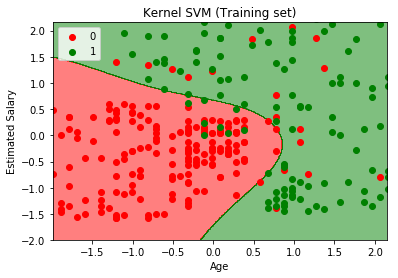

In [49]:
# Visualising the training set results
X1, X2 = np.meshgrid(np.arange(start = X_train[:,0].min(), stop = X_train[:,0].max(), step = 0.01),
                     np.arange(start = X_train[:,0].min(), stop = X_train[:,0].max(), step = 0.01))
plt.contourf(X1, X2, classifier_k.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_train)):
    plt.scatter(X_train[Y_train == j, 0], X_train[Y_train == j, 1], c= ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend() 
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


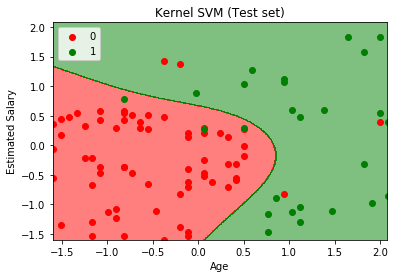

In [50]:
# Visualising the test set results
X1, X2 = np.meshgrid(np.arange(start = X_test[:,0].min(), stop = X_test[:,0].max(), step = 0.01),
                     np.arange(start = X_test[:,0].min(), stop = X_test[:,0].max(), step = 0.01))
plt.contourf(X1, X2, classifier_k.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_train)):
    plt.scatter(X_test[Y_test == j, 0], X_test[Y_test == j, 1], c= ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend() 
plt.show()